In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [3]:
df = pd.read_csv('../Data/Youtube/USvideos.csv')

In [4]:
df = df.drop_duplicates()

In [5]:
df = df.sort_values(by='dislikes', ascending = False)

In [6]:
p = pd.pivot_table(df, values=['dislikes','likes'], index=['title','channel_title']) 
p = p.sort_values(by='dislikes', ascending = False)

C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48169 missing 

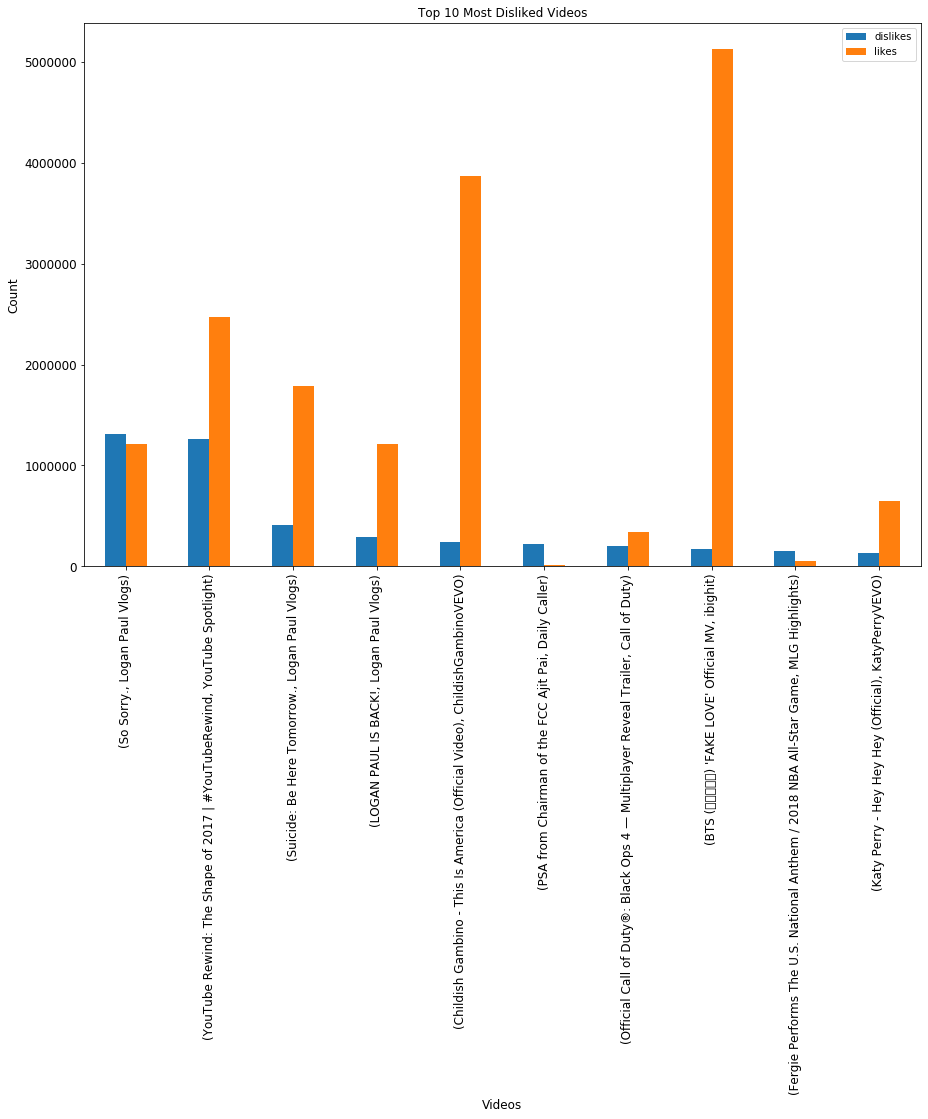

In [7]:
ax = p[['dislikes','likes']][:10].plot(kind='bar', title ="Top 10 Most Disliked Videos", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

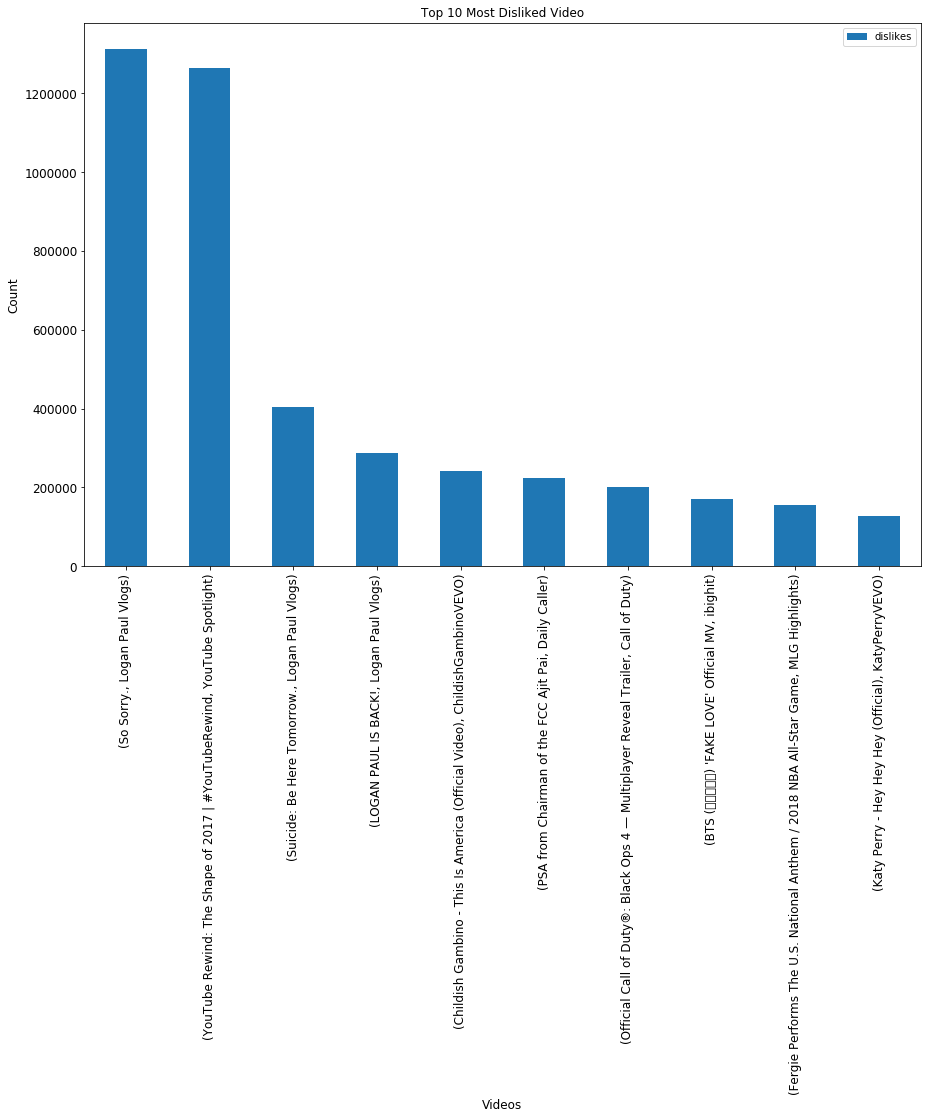

In [8]:
ax = p[['dislikes']][:10].plot(kind='bar', title ="Top 10 Most Disliked Video", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [9]:
p

,,dislikes,likes
title,channel_title,,
So Sorry.,Logan Paul Vlogs,1.313220e+06,1.213676e+06
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,YouTube Spotlight,1.263894e+06,2.472672e+06
Suicide: Be Here Tomorrow.,Logan Paul Vlogs,4.049249e+05,1.783878e+06
LOGAN PAUL IS BACK!,Logan Paul Vlogs,2.862875e+05,1.211898e+06
Childish Gambino - This Is America (Official Video),ChildishGambinoVEVO,2.421774e+05,3.868033e+06
...,...,...,...
"1 dead, others injured after Ky. school shooting",Newsy,0.000000e+00,9.000000e+00
Physical Encoder for an Open Source Braille Embosser,Carlos Campos,0.000000e+00,1.750000e+00
Jamie Foxx Awkward Interview SportsCenter Michael Smith,Prince Marcus,0.000000e+00,1.425000e+01


In [15]:
p = p[p['dislikes'] > 1000]  
p = p[p['likes'] > 1000]
p['dislike_ratio'] = p['dislikes']/(p['dislikes']+p['likes'])

In [18]:
p = p.sort_values(by='dislike_ratio', ascending = False)

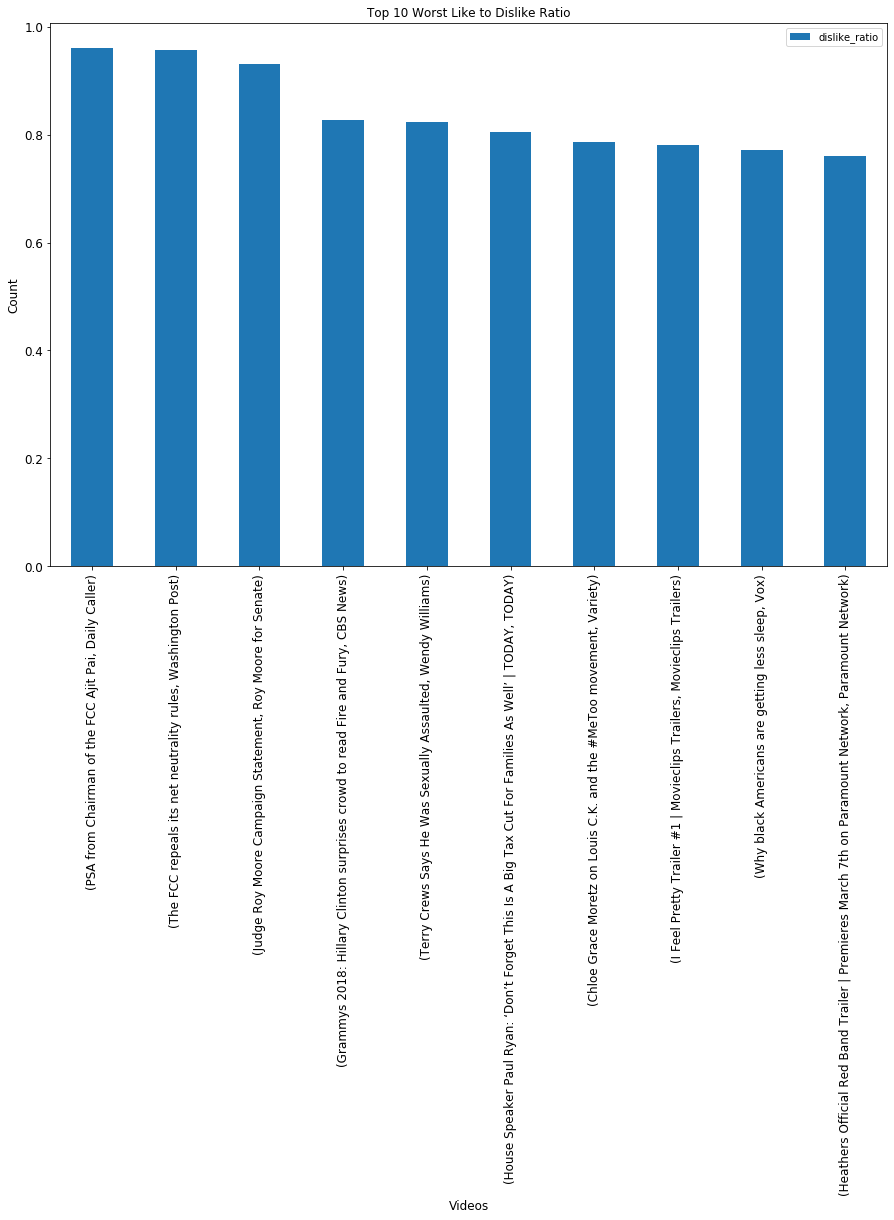

In [19]:
ax = p[['dislike_ratio']][:10].plot(kind='bar', title ="Top 10 Worst Like to Dislike Ratio", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [23]:
p = p[p['dislikes'] > 1000]  
p = p[p['likes'] > 1000]
p['like_ratio'] = p['likes']/(p['dislikes']+p['likes'])
p = p.sort_values(by='like_ratio', ascending = False)

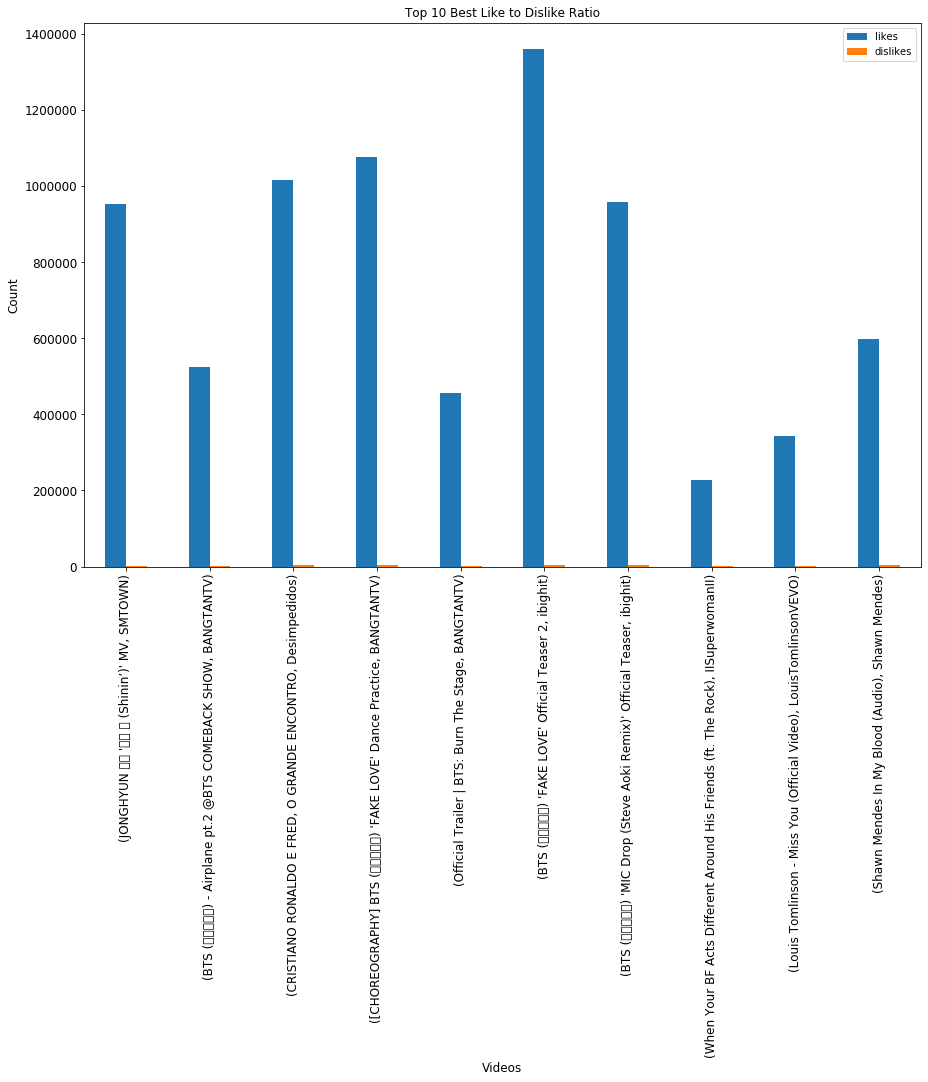

In [27]:
ax = p[['likes', 'dislikes']][:10].plot(kind='bar', title ="Top 10 Best Like to Dislike Ratio", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [28]:
p

,,dislikes,likes,dislike_ratio,like_ratio
title,channel_title,,,,
JONGHYUN 종현 '빛이 나 (Shinin’)' MV,SMTOWN,2428.166667,9.537250e+05,0.002540,0.997460
BTS (방탄소년단) - Airplane pt.2 @BTS COMEBACK SHOW,BANGTANTV,1666.000000,5.251963e+05,0.003162,0.996838
"CRISTIANO RONALDO E FRED, O GRANDE ENCONTRO",Desimpedidos,3596.333333,1.017472e+06,0.003522,0.996478
[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance Practice,BANGTANTV,4007.777778,1.076063e+06,0.003711,0.996289
Official Trailer | BTS: Burn The Stage,BANGTANTV,1758.461538,4.565430e+05,0.003837,0.996163
...,...,...,...,...,...
Terry Crews Says He Was Sexually Assaulted,Wendy Williams,14575.000000,3.110000e+03,0.824145,0.175855
Grammys 2018: Hillary Clinton surprises crowd to read Fire and Fury,CBS News,16493.666667,3.432333e+03,0.827746,0.172254
Judge Roy Moore Campaign Statement,Roy Moore for Senate,49744.875000,3.627875e+03,0.932028,0.067972
